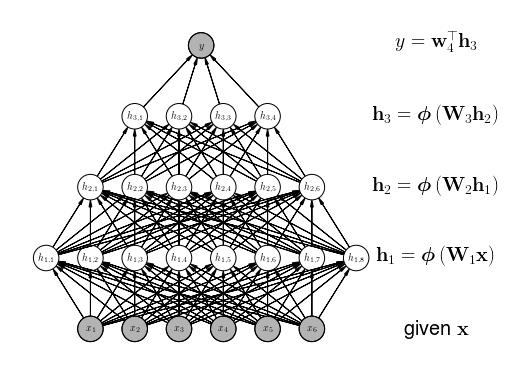

In [119]:
import matplotlib
rc("font", **{'family':'sans-serif','sans-serif':['Helvetica']}, size=10)
rc("text", usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
shape = [5, 5]
xpadding = 2
ypadding = 0
pgm = daft.PGM(shape=[shape[0]+xpadding, shape[1]+ypadding],
               origin=[0, 0], 
               grid_unit=2.5, 
               node_unit=0.9, 
               observed_style='shaded',
              line_width=1)
layers = [6, 8, 6, 4, 1]
layer_label = ['x_{index}', 'h_{{1,{index}}}', 'h_{{2,{index}}}', 'h_{{3,{index}}}', 'y']
layer_observed = [True, False, False, False, True]
layer_fixed = [False, False, False, False, False]
layer_text = [r'given $\mathbf{x}$', r'$\mathbf{h}_1=\boldsymbol{\phi}\left(\mathbf{W}_1\mathbf{x}\right)$', 
              r'$\mathbf{h}_2=\boldsymbol{\phi}\left(\mathbf{W}_2\mathbf{h}_1\right)$',
              r'$\mathbf{h}_3=\boldsymbol{\phi}\left(\mathbf{W}_3\mathbf{h}_2\right)$',
              r'$y=\mathbf{w}_4^\top\mathbf{h}_3$']
#layer_label = ['x_{index}','y_{index}']
#layer_observed = [False, False]
maxwidth = max(layers)
for i in range(len(layers)):
    posy = yoffset + i*(shape[1])/(len(layers))        
    for j in range(layers[i]):
        xoffset = (shape[0])*(maxwidth-layers[i])/(2*(maxwidth))+0.5
        yoffset = 0.5
        posx = xoffset + j*(shape[0])/(maxwidth)
        pgm.add_node(daft.Node(layer_label[i].format(index=j+1),
                               ('$' + layer_label[i] + '$').format(index=j+1), 
                               posx, posy,
                               observed=layer_observed[i],
                               fixed=layer_fixed[i]))
    for j in range(layers[i]):
        if i > 0:
            for k in range(layers[i-1]):
                    pgm.add_edge(layer_label[i-1].format(index=k+1), 
                                 layer_label[i].format(index=j+1))
ctx = pgm.render()
fig = ctx.figure
ax = plt.gca()
fig.savefig("../../slides/diagrams/deep-nn1.svg", transparent=True)

for i in range(len(layers)):
    posy = yoffset + i*(shape[1]-ypadding)/(len(layers))
    posx = shape[0] + xpadding/2 
    x, y = pgm._ctx.convert(posx, posy)
    ax.text(x, y, layer_text[i], ha="center", va="center", fontsize=20)



fig.savefig("../../slides/diagrams/deep-nn2.svg", transparent=True)

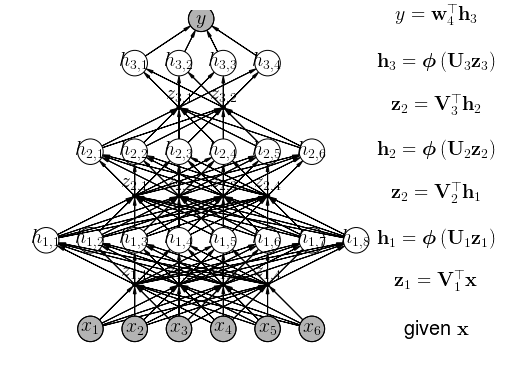

In [127]:
pgm = daft.PGM(shape=[shape[0]+xpadding, shape[1]+ypadding],
               origin=[0, 0], 
               grid_unit=2.5, 
               node_unit=0.9, 
               observed_style='shaded',
              line_width=1)
layers = [6, 4, 8, 4, 6, 2, 4, 1]
layer_label = ['x_{index}', 'z_{{1,{index}}}', 'h_{{1,{index}}}', 'z_{{2,{index}}}', 'h_{{2,{index}}}', 'z_{{3,{index}}}', 'h_{{3,{index}}}', 'y']
layer_observed = [True, False, False, False, False, False, False, True]
layer_fixed = [False, True, False, True, False, True, False, False]
layer_text = [r'given $\mathbf{x}$', 
              r'$\mathbf{z}_1 = \mathbf{V}_1^\top\mathbf{x}$', 
              r'$\mathbf{h}_1=\boldsymbol{\phi}\left(\mathbf{U}_1\mathbf{z}_1\right)$', 
              r'$\mathbf{z}_2 = \mathbf{V}_2^\top\mathbf{h}_1$',
              r'$\mathbf{h}_2=\boldsymbol{\phi}\left(\mathbf{U}_2\mathbf{z}_2\right)$',
              r'$\mathbf{z}_2 = \mathbf{V}_3^\top\mathbf{h}_2$',
              r'$\mathbf{h}_3=\boldsymbol{\phi}\left(\mathbf{U}_3\mathbf{z}_3\right)$',
              r'$y=\mathbf{w}_4^\top\mathbf{h}_3$']
#layer_label = ['x_{index}','y_{index}']
#layer_observed = [False, False]
maxwidth = max(layers)
for i in range(len(layers)):
    posy = yoffset + i*(shape[1])/(len(layers))        
    for j in range(layers[i]):
        xoffset = (shape[0])*(maxwidth-layers[i])/(2*(maxwidth))+0.5
        yoffset = 0.5
        posx = xoffset + j*(shape[0])/(maxwidth)
        pgm.add_node(daft.Node(layer_label[i].format(index=j+1),
                               ('$' + layer_label[i] + '$').format(index=j+1), 
                               posx, posy,
                               observed=layer_observed[i],
                               fixed=layer_fixed[i]))
    for j in range(layers[i]):
        if i > 0:
            for k in range(layers[i-1]):
                    pgm.add_edge(layer_label[i-1].format(index=k+1), 
                                 layer_label[i].format(index=j+1))
ctx = pgm.render()
fig = ctx.figure
ax = plt.gca()

layer_text = ['input layer', 'latent layer 1', 'hidden layer 1', 
              'latent layer 2', 'hidden layer 2', 'latent layer 3', 
              'hidden layer 3', 'output layer']
a = []
for i in range(len(layers)):
    posy = yoffset + i*(shape[1]-ypadding)/(len(layers))
    posx = shape[0] + xpadding/2 
    x, y = pgm._ctx.convert(posx, posy)
    a.append(ax.text(x, y, layer_text[i], ha="center", va="center", fontsize=20))

fig.savefig("../../slides/diagrams/deep-nn-bottleneck1.svg", transparent=True)

layer_text = [r'given $\mathbf{x}$', 
              r'$\mathbf{z}_1 = \mathbf{V}_1^\top\mathbf{x}$', 
              r'$\mathbf{h}_1=\boldsymbol{\phi}\left(\mathbf{U}_1\mathbf{z}_1\right)$', 
              r'$\mathbf{z}_2 = \mathbf{V}_2^\top\mathbf{h}_1$',
              r'$\mathbf{h}_2=\boldsymbol{\phi}\left(\mathbf{U}_2\mathbf{z}_2\right)$',
              r'$\mathbf{z}_2 = \mathbf{V}_3^\top\mathbf{h}_2$',
              r'$\mathbf{h}_3=\boldsymbol{\phi}\left(\mathbf{U}_3\mathbf{z}_3\right)$',
              r'$y=\mathbf{w}_4^\top\mathbf{h}_3$']

for i in range(len(layers)):
    a[i].set(text=layer_text[i])


fig.savefig("../../slides/diagrams/deep-nn-bottleneck2.svg", transparent=True)

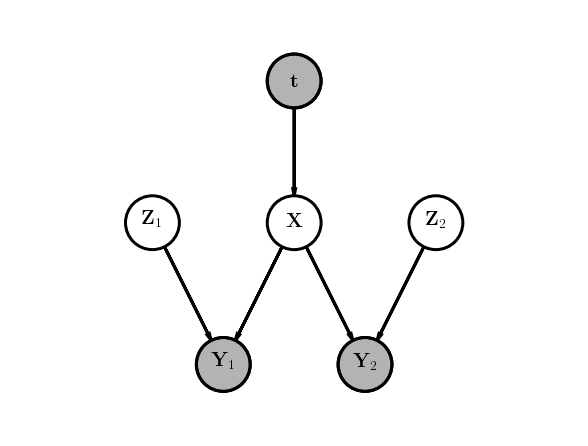

In [125]:
rc("font", **{'family':'sans-serif','sans-serif':['Helvetica']}, size=20)
rc("text", usetex=True)
pgm = daft.PGM(shape=[4, 3],
               origin=[0, 0], 
               grid_unit=5, 
               node_unit=1.9, 
               observed_style='shaded',
              line_width=3)

pgm.add_node(daft.Node("t", r"$\mathbf{t}$", 2, 2.5, observed=True))
pgm.add_node(daft.Node("X", r"$\mathbf{X}$", 2, 1.5))
pgm.add_node(daft.Node("Z_1", r"$\mathbf{Z}_1$", 1, 1.5))
pgm.add_node(daft.Node("Z_2", r"$\mathbf{Z}_2$", 3, 1.5))
pgm.add_node(daft.Node("Y_1", r"$\mathbf{Y}_1$", 1.5, 0.5, observed=True))
pgm.add_node(daft.Node("Y_2", r"$\mathbf{Y}_2$", 2.5, 0.5, observed=True))
pgm.add_edge("t", "X")
pgm.add_edge("X", "Y_1")
pgm.add_edge("X", "Y_2")
pgm.add_edge("Z_1", "Y_1")
pgm.add_edge("Z_2", "Y_2")

pgm.render().figure.savefig("../../slides/diagrams/shared.svg", transparent=True)

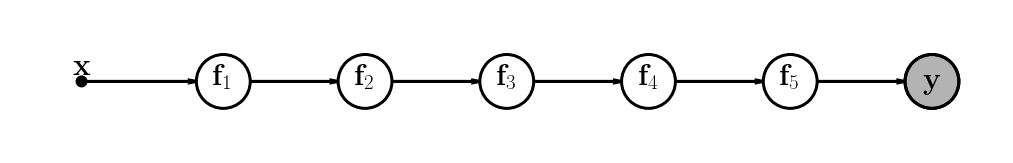

In [139]:
from matplotlib import rc

# ff = "comic sans ms"
ff = ''
# ff = "times new roman"

rc("font", **{'family':'sans-serif','sans-serif':['Helvetica']}, size=30)
rc("text", usetex=True)
#rc("font", family=ff, size=30)
pgm = daft.PGM(shape=[7, 1],
               origin=[0, 0], 
               grid_unit=5, 
               node_unit=1.9, 
               observed_style='shaded',
              line_width=3)


pgm.add_node(daft.Node("x", r"$\mathbf{x}$", 0.5, 0.5, fixed=True))
pgm.add_node(daft.Node("f_1", r"$\mathbf{f}_1$", 1.5, 0.5, fixed=False))
pgm.add_node(daft.Node("f_2", r"$\mathbf{f}_2$", 2.5, 0.5, fixed=False))
pgm.add_node(daft.Node("f_3", r"$\mathbf{f}_3$", 3.5, 0.5, fixed=False))
pgm.add_node(daft.Node("f_4", r"$\mathbf{f}_4$", 4.5, 0.5, fixed=False))
pgm.add_node(daft.Node("f_5", r"$\mathbf{f}_5$", 5.5, 0.5, fixed=False))
pgm.add_node(daft.Node("y", r"$\mathbf{y}$", 6.5, 0.5, observed=True))
pgm.add_edge("x", "f_1")
pgm.add_edge("f_1", "f_2")
pgm.add_edge("f_2", "f_3")
pgm.add_edge("f_3", "f_4")
pgm.add_edge("f_4", "f_5")
pgm.add_edge("f_5", "y")

pgm.render().figure.savefig("../../slides/diagrams/deep-markov.svg", transparent=True)

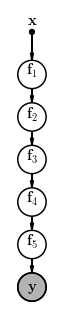

In [138]:
from matplotlib import rc

# ff = "comic sans ms"
ff = ''
# ff = "times new roman"

rc("font", **{'family':'sans-serif','sans-serif':['Helvetica']}, size=15)
rc("text", usetex=True)
#rc("font", family=ff, size=30)
pgm = daft.PGM(shape=[1, 7],
               origin=[0, 0], 
               grid_unit=1.5, 
               node_unit=1, 
               observed_style='shaded',
              line_width=1.5)


pgm.add_node(daft.Node("x", r"$\mathbf{x}$", 0.5, 6.5, fixed=True))
pgm.add_node(daft.Node("f_1", r"$\mathbf{f}_1$", 0.5, 5.5, fixed=False))
pgm.add_node(daft.Node("f_2", r"$\mathbf{f}_2$", 0.5, 4.5, fixed=False))
pgm.add_node(daft.Node("f_3", r"$\mathbf{f}_3$", 0.5, 3.5, fixed=False))
pgm.add_node(daft.Node("f_4", r"$\mathbf{f}_4$", 0.5, 2.5, fixed=False))
pgm.add_node(daft.Node("f_5", r"$\mathbf{f}_5$", 0.5, 1.5, fixed=False))
pgm.add_node(daft.Node("y", r"$\mathbf{y}$", 0.5, 0.5, observed=True))
pgm.add_edge("x", "f_1")
pgm.add_edge("f_1", "f_2")
pgm.add_edge("f_2", "f_3")
pgm.add_edge("f_3", "f_4")
pgm.add_edge("f_4", "f_5")
pgm.add_edge("f_5", "y")

pgm.render().figure.savefig("../../slides/diagrams/deep-markov-vertical.svg", transparent=True)

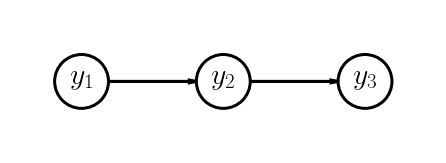

In [46]:
from matplotlib import rc

# ff = "comic sans ms"
ff = ''
# ff = "times new roman"

rc("font", **{'family':'sans-serif','sans-serif':['Helvetica']}, size=30)
rc("text", usetex=True)
#rc("font", family=ff, size=30)
pgm = daft.PGM(shape=[3, 1],
               origin=[0, 0], 
               grid_unit=5, 
               node_unit=1.9, 
               observed_style='shaded',
              line_width=3)


pgm.add_node(daft.Node("y_1", r"$y_1$", 0.5, 0.5, fixed=False))
pgm.add_node(daft.Node("y_2", r"$y_2$", 1.5, 0.5, fixed=False))
pgm.add_node(daft.Node("y_3", r"$y_3$", 2.5, 0.5, fixed=False))
pgm.add_edge("y_1", "y_2")
pgm.add_edge("y_2", "y_3")

pgm.render().figure.savefig("../../slides/diagrams/markov.svg", transparent=True)

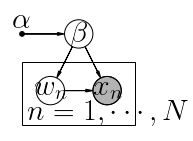

In [45]:
# Instantiate the PGM.
pgm = daft.PGM([2.3, 2.05], origin=[0.3, 0.3])

# Hierarchical parameters.
pgm.add_node(daft.Node("alpha", r"$\alpha$", 0.5, 2, fixed=True))
pgm.add_node(daft.Node("beta", r"$\beta$", 1.5, 2))

# Latent variable.
pgm.add_node(daft.Node("w", r"$w_n$", 1, 1))

# Data.
pgm.add_node(daft.Node("x", r"$x_n$", 2, 1, observed=True))

# Add in the edges.
pgm.add_edge("alpha", "beta")
pgm.add_edge("beta", "w")
pgm.add_edge("w", "x")
pgm.add_edge("beta", "x")

# And a plate.
pgm.add_plate(daft.Plate([0.5, 0.5, 2, 1], label=r"$n = 1, \cdots, N$",
    shift=-0.1))

# Render and save.
pgm.render()
pgm.figure.savefig("classic.svg")
pgm.figure.savefig("classic.png", dpi=150)